In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from skimage.io import imread
from skimage.transform import pyramid_reduce, resize

import os
import glob

In [12]:
DATA_PATH = os.path.abspath("..\\..\\00_MLDL\\00_BreadBrother\\04_Image_Segmentation\\") # Variable path

img_list = sorted(glob.glob(os.path.join(DATA_PATH, "2d_images\\*.tif")))
mask_list = sorted(glob.glob(os.path.join(DATA_PATH, "2d_masks\\*.tif")))

print(f"CT Image length: {len(img_list)}")
print(f"Lung mask length: {len(mask_list)}")

CT Image length: 267
Lung mask length: 267


## Preprocessing

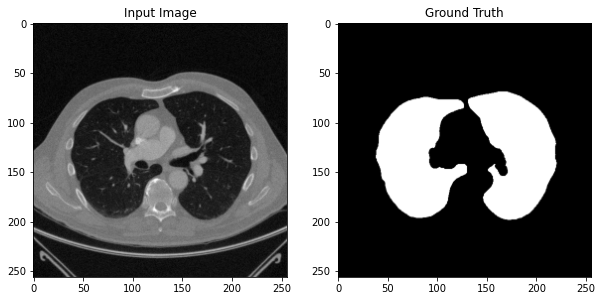

In [20]:
IMG_SIZE = 256

x_data, y_data = np.empty((2, len(img_list), IMG_SIZE, IMG_SIZE, 1), dtype=np.float32)

for i, img_path in enumerate(img_list):
    img = imread(img_path)
    img = resize(img, output_shape=(IMG_SIZE, IMG_SIZE, 1), preserve_range=True) # Original size 512, 512 to 256, 256
    # Input image
    x_data[i] = img

for i, mask_path in enumerate(mask_list):
    mask = imread(mask_path)
    mask = resize(mask, output_shape=(IMG_SIZE, IMG_SIZE, 1), preserve_range=True)
    # Groundtruth
    y_data[i] = mask

# Normalize
y_data /= 255.

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Input Image")
plt.imshow(x_data[0].squeeze(), cmap="gray")
plt.subplot(1,2,2)
plt.title("Ground Truth")
plt.imshow(y_data[0].squeeze(), cmap="gray")

In [24]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size = 0.1)

np.save(os.path.join(DATA_PATH, "dataset\\x_train.npy"), x_train)
np.save(os.path.join(DATA_PATH, "dataset\\y_train.npy"), y_train)
np.save(os.path.join(DATA_PATH, "dataset\\x_val.npy"), x_val)
np.save(os.path.join(DATA_PATH, "dataset\\y_val.npy"), y_val)

print(f"Training image: {x_train.shape}") # 240
print(f"Training mask: {y_train.shape}")
print(f"Validation image: {x_val.shape}") # 27
print(f"Validation mask: {y_val.shape}")

Training image: (240, 256, 256, 1)
Training mask: (240, 256, 256, 1)
Validation image: (27, 256, 256, 1)
Validation mask: (27, 256, 256, 1)
